<a href="https://colab.research.google.com/github/anshuman-unilu/notebooks/blob/master/Copy_of_Sequential_behavior_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import urllib.request
import urllib
import urllib.parse
import json
import pandas as pd
from urllib.error import HTTPError
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from datetime import datetime
import random
import string
from collections import defaultdict
import seaborn as sns
import sys
%matplotlib inline
!pip install seaborn --upgrade

In [0]:
from google.colab import files
uploaded = files.upload()

Saving companyInfo.csv to companyInfo.csv


In [0]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2019-04-12 10:00:14--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.203.102.189, 52.22.236.254, 3.92.108.98, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.203.102.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14977695 (14M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  14.28M  37.2MB/s    in 0.4s    

2019-04-12 10:00:15 (37.2 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [14977695/14977695]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [0]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://50b39855.ngrok.io


In [0]:
allPortfolios = pd.read_csv("portfolios.customers.csv")

In [0]:
transactions  = allPortfolios.set_index(allPortfolios["Symbol"]).join(stockVectors).set_index(allPortfolios["#"])

In [0]:
transactions = transactions.drop(columns=['#', 'Action', 'Company Name',"Exchange","Sector", "_id", "Year","Month","Day","Week","Symbol","portfolio","Date","Quantity","Opening Price"])

In [0]:
ports = pd.get_dummies(allPortfolios["portfolio"])

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
context = pd.concat([vixData,vixData.shift(1),vixData.shift(3),vixData.shift(5),vixData.shift(10),vixData.shift(20),vixData.shift(40),vixData.shift(60),vixData.shift(-1),vixData.shift(-3),vixData.shift(-5),vixData.shift(-10),vixData.shift(-20),vixData.shift(-40),vixData.shift(-60),
          nasdaq,nasdaq.shift(1),nasdaq.shift(3),nasdaq.shift(5),nasdaq.shift(10),nasdaq.shift(20),nasdaq.shift(40),nasdaq.shift(60),nasdaq.shift(-1),nasdaq.shift(-3),nasdaq.shift(-5),nasdaq.shift(-10),nasdaq.shift(-20),nasdaq.shift(-40),nasdaq.shift(-60)],axis=1).dropna()

In [0]:
def normalization(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [0]:
context = normalization(context)

In [0]:
allPortfolios["Date"] = pd.to_datetime(allPortfolios["Date"])

In [0]:
allPortfolios["Year"]  = allPortfolios["Date"].dt.year
allPortfolios["Month"]  = allPortfolios["Date"].dt.month
allPortfolios["Day"]  = allPortfolios["Date"].dt.day
allPortfolios["Week"]  = allPortfolios["Date"].dt.week

In [0]:
#VIX Data
vixURL = "http://www.cboe.com/publish/scheduledtask/mktdata/datahouse/vixcurrent.csv"
nasdaq = pd.read_csv("nasdaq.csv", index_col="Date",parse_dates=True)
vixData = pd.read_csv(vixURL,header=1, index_col="Date",parse_dates=True)

In [0]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
from keras.layers import Input, Dense,Dropout, BatchNormalization, Concatenate,concatenate,average
from keras.models import Model
from keras import regularizers

activity_regularizer = None
activation = "relu"

contextInput = Input(shape=(14,))
encodedContext = Dense(14, activation=None,activity_regularizer=None)(contextInput)
#encodedContext = Dropout(0.3)(encodedContext)
#encodedContext = BatchNormalization()(encodedContext)
#encodedContext = Dense(10, activation=activation,activity_regularizer=activity_regularizer)(encodedContext)
#encodedContext = Dropout(0.3)(encodedContext)
#encodedContext = BatchNormalization()(encodedContext)
#encodedContext = Dense(10, activation=activation,activity_regularizer=activity_regularizer)(encodedContext)

stockVectorInput = Input(shape=(stockVectors.shape[1],))
auxOutput = Dense(stockVectors.shape[1],activation=None)(stockVectorInput)

auxModel = Model(stockVectorInput,auxOutput)



transactionInput = Input(shape=(allPortfoliosWithoutVIX.shape[1],))
encodedTransactions = Dense(100, activation=activation,activity_regularizer=activity_regularizer)(transactionInput)
encodedTransactions = Dropout(0.3)(encodedTransactions)
encodedTransactions = BatchNormalization()(encodedTransactions)
encodedTransactions = Dense(50, activation=activation,activity_regularizer=activity_regularizer)(encodedTransactions)
#encodedTransactions = Dropout(0.3)(encodedTransactions)
#encodedTransactions = BatchNormalization()(encodedTransactions)
#encodedTransactions = Dense(20, activation=activation,activity_regularizer=activity_regularizer)(encodedTransactions)

portfolioInput = Input(shape=(ports.shape[1],))
encodedPortfolio = Dense(30, activation=activation,activity_regularizer=activity_regularizer)(portfolioInput)
encodedPortfolio = Dropout(0.3)(encodedPortfolio)
encodedPortfolio = BatchNormalization()(encodedPortfolio)
encodedPortfolio = Dense(10, activation=activation,activity_regularizer=activity_regularizer)(encodedPortfolio)
#encodedPortfolio = Dropout(0.3)(encodedPortfolio)
#encodedPortfolio = BatchNormalization()(encodedPortfolio)
#encodedPortfolio = Dense(10, activation=activation,activity_regularizer=activity_regularizer)(encodedPortfolio)

combined = concatenate([encodedContext,encodedTransactions,auxModel.output])


contextEncoder = Model(inputs=contextInput,outputs=encodedContext)

transactionEncoder = Model(inputs=contextInput,outputs=encodedTransactions)

portfolioEncoder = Model(inputs=portfolioInput,outputs=encodedPortfolio)

#portsInput = Input(shape=(combined.shape[1],))



decodedPortfolio = Dense(20, activation=activation,activity_regularizer=activity_regularizer)(combined)
decodedPortfolio = Dense(40, activation=activation,activity_regularizer=activity_regularizer)(decodedPortfolio)
decodedPortfolio = Dense(50, activation=activation,activity_regularizer=activity_regularizer)(decodedPortfolio)
decodePortfolio = Dense(int(ports.shape[1]),activation=activation,name = "portfolioDecoder")(decodedPortfolio)


decodedContext = Dense(10, activation=activation,activity_regularizer=activity_regularizer)(combined)
decodedContext = Dense(10, activation=activation,activity_regularizer=activity_regularizer)(decodedContext)
decodedContext = Dense(20, activation=activation,activity_regularizer=activity_regularizer)(decodedContext)
decodeContext = Dense(int(context.shape[1]),activation=activation,name = "contextDecoder")(decodedContext)

decodedTransactions = Dense(10, activation=activation,activity_regularizer=activity_regularizer)(combined)
decodedTransactions = Dense(15, activation=activation,activity_regularizer=activity_regularizer)(decodedTransactions)
decodedTransactions = Dense(20, activation=activation,activity_regularizer=activity_regularizer)(decodedTransactions)
decodeTransaction = Dense(allPortfoliosWithoutVIX.shape[1],activation =activation,name = "transactionDecoder")(decodedTransactions)

dualEncoder = Model(inputs=[contextInput,transactionInput,stockVectorInput],outputs=combined)

dualAutoencoder = Model(inputs=[contextInput,transactionInput,stockVectorInput]
                        ,outputs=[decodeContext,decodeTransaction]
                       ,name="autoencoder")

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


NameError: ignored

In [0]:
loss_weights = {"contextDecoder":0.25,
                "transactionDecoder":0.25,
                "classifier":1.0
}
dualAutoencoder.compile(optimizer='adam', loss=["mse","mse"],metrics=["accuracy"])

In [0]:
dualAutoencoder.fit([context,allPortfoliosWithoutVIX,stockData], [context,allPortfoliosWithoutVIX],
                epochs=50,
                batch_size=32,
                shuffle=True)

In [0]:
dualEncoderOutput = dualEncoder.predict([context,allPortfoliosWithoutVIX,stockData])

In [0]:
context.shape

(1391, 150)

In [0]:
contextTransactions = allPortfolios.set_index(allPortfolios["Date"]).join(context).fillna(0.0).iloc[:,-150:]

In [0]:
transactions = pd.DataFrame(np.hstack([transactions,contextTransactions]),index=allPortfolios["portfolio"])

In [0]:
transactions

,0,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
portfolio,,,,,,,,,,,,,,,,,,,,,
1T5Y31,0.242926,0.257958,-0.307056,-0.016536,0.107568,0.266759,0.200787,-0.146868,0.182300,0.002522,...,0.306831,0.309276,0.309276,0.034812,0.278718,0.279548,0.282050,0.275976,0.275976,0.031686
1T5Y31,-0.218263,0.021592,0.235580,0.550048,-0.217551,0.195013,0.235430,-0.159674,-0.144745,-0.000005,...,0.303020,0.306460,0.306460,0.031465,0.271535,0.270185,0.269651,0.271316,0.271316,0.032330
1T5Y31,-0.103193,0.298102,0.100719,0.210907,-0.338243,-0.041476,0.566650,0.001925,0.252697,-0.332538,...,0.303020,0.306460,0.306460,0.031465,0.271535,0.270185,0.269651,0.271316,0.271316,0.032330
1T5Y31,0.665952,-0.030758,0.337454,-0.103461,-0.101866,-0.064489,0.187090,-0.254823,0.072663,-0.025451,...,0.303020,0.306460,0.306460,0.031465,0.271535,0.270185,0.269651,0.271316,0.271316,0.032330
1T5Y31,0.671669,0.238786,0.340062,-0.101346,-0.151632,0.063032,-0.034982,0.043106,0.112277,0.133839,...,0.303020,0.306460,0.306460,0.031465,0.271535,0.270185,0.269651,0.271316,0.271316,0.032330
1T5Y31,0.015890,-0.219885,-0.256884,-0.532490,-0.338184,0.188381,0.063360,0.309212,0.102166,0.285469,...,0.308391,0.309918,0.309918,0.029730,0.269498,0.270625,0.276101,0.272830,0.272830,0.026962
1T5Y31,0.076926,-0.023773,0.419306,0.202587,0.069575,-0.019634,0.159204,-0.025708,0.248440,-0.218159,...,0.298521,0.297683,0.297683,0.033076,0.262789,0.277009,0.271575,0.279685,0.279685,0.029960
DEJPWK,0.159036,-0.248555,-0.430627,0.032495,-0.316649,0.386997,0.133519,0.334247,-0.127129,0.103918,...,0.298521,0.297683,0.297683,0.033076,0.262789,0.277009,0.271575,0.279685,0.279685,0.029960
1T5Y31,0.133804,-0.248289,-0.438281,0.035236,-0.318866,0.396173,0.124659,0.345604,-0.127923,0.104934,...,0.299007,0.301008,0.301008,0.029253,0.276803,0.281356,0.284412,0.278086,0.278086,0.027122


In [0]:
inputPortfolio = Input(shape=(ports.shape[1],))
#softmax1 = Dense(80,activation="relu",name="classifier1",use_bias=False)
#softmax1output = softmax1(inputPortfolio)
#softmax1output = Dropout(0.3)(softmax1output)
softmax2 = Dense(100,activation="tanh",name="classifier2",use_bias=False)
softmax2output = softmax2(inputPortfolio)
softmax3 = Dense(transactions.shape[1],activation="softmax",name="classifier",use_bias=True)
softmax3Output = softmax3(softmax2output)

classifierModel = Model(inputs=inputPortfolio, outputs=softmax3Output)

In [0]:
classifierModel.compile("adam","mse")

In [0]:
classifierModel.fit(ports,transactions,epochs=50, batch_size=16, shuffle=True)

Epoch 1/50
1959/1959 [==============================] - 0s 204us/step - loss: 0.1843
Epoch 2/50
1959/1959 [==============================] - 0s 87us/step - loss: 0.1835
Epoch 3/50
1959/1959 [==============================] - 0s 87us/step - loss: 0.1826
Epoch 4/50
1959/1959 [==============================] - 0s 85us/step - loss: 0.1823
Epoch 5/50
1959/1959 [==============================] - 0s 87us/step - loss: 0.1822
Epoch 6/50
1959/1959 [==============================] - 0s 86us/step - loss: 0.1820
Epoch 7/50
1959/1959 [==============================] - 0s 87us/step - loss: 0.1819
Epoch 8/50
1959/1959 [==============================] - 0s 86us/step - loss: 0.1819
Epoch 9/50
1959/1959 [==============================] - 0s 86us/step - loss: 0.1818
Epoch 10/50
1959/1959 [==============================] - 0s 86us/step - loss: 0.1818
Epoch 11/50
1959/1959 [==============================] - 0s 86us/step - loss: 0.1817
Epoch 12/50
1959/1959 [==============================] - 0s 86us/step - l

In [0]:
portfolioEncoderOutput = pd.DataFrame(portfolioEncoder.predict(ports),index=allPortfolios["#"])

NameError: ignored

In [0]:
portfolioEncoderOutput = portfolioEncoderOutput.apply(normalize,axis=1)

In [0]:
contextEncoderOutput = pd.DataFrame(contextEncoder.predict(context),index=allPortfolios["#"])

In [0]:
contextEncoderOutput = contextEncoderOutput.apply(normalize,axis=1)

In [0]:
transactionEncoderOutput = pd.DataFrame(transactionEncoder.predict(allPortfoliosWithoutVIX),index=allPortfolios["#"])

In [0]:
transactionEncoderOutput = transactionEncoderOutput.apply(normalize, axis=1)

In [0]:
dualEncoderOutput = pd.DataFrame(dualEncoderOutput,index=allPortfolios["#"])
dualEncoderOutput = dualEncoderOutput.apply(normalize,axis=1)

In [0]:
portfoliosVectors = pd.DataFrame(ports@softmax2.get_weights()[0])

In [0]:
portfoliosVectors["portfolio"] = allPortfolios["portfolio"]

In [0]:
portfoliosVectors.index = portfoliosVectors.portfolio

In [0]:
portfoliosVectors = portfoliosVectors.groupby(portfoliosVectors.index).first().drop(columns=["portfolio"])

In [0]:
portfoliosVectors = portfoliosVectors.apply(normalize,axis=1)

AttributeError: ignored

In [0]:
from sklearn.neighbors import NearestNeighbors
def cosine_knn(corpus_vector, queries_vector, k=10):
    """
    :param corpus_vector: vectorized document text
    :param queries_vector: vectorized query text
    :param k: number of neighbours
    :return: (distances, indices) of knn
    """
    # based on
    # http://scikit-learn.org/stable/modules/neighbors.html
    # http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

    # since we want to use cosine similarity to account for document length
    # we have to use bruteforce search
    # parallelize to number of cores with n_jobs -1
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='cosine')
    nbrs.fit(corpus_vector)
    distances, indices = nbrs.kneighbors(queries_vector.values.reshape(1,165))
    return distances, indices

In [0]:
d,i = cosine_knn(transactions.fillna(0.0),transactions.fillna(0.0).iloc[100])

In [0]:
d,i

(array([[0.        , 0.02870797, 0.02870797, 0.03629404, 0.03760234,
         0.03760234, 0.04269395, 0.04280337, 0.04350853, 0.04459885]]),
 array([[100, 582, 583, 615, 632, 631, 163, 140, 586, 590]]))

In [0]:
allPortfolios.iloc[i[0]].join(transactions.reset_index(),lsuffix="_").iloc[:,5:25]

,Opening Price,Quantity,Sector,Symbol,_id,portfolio_,Year,Month,Day,Week,portfolio,0,1,2,3,4,5,6,7,8
100,19.1500,75,Technology,VPG,5c9e4166c531c55064643dbd,BLE833,2016,12,9,49,BLE833,0.120781,0.286815,0.645028,-0.440088,-0.059692,0.100762,0.233327,-0.050972,0.145379
582,57.9500,85,Technology,GWRE,5c9e4469c531c520b4411ca9,QFVXU1,2016,10,20,42,QFVXU1,-0.292590,0.022861,0.518003,-0.297731,-0.144485,0.081619,0.196960,0.102237,0.278938
583,6.0460,60,Technology,RELL,5c9e446ac531c520b4411caa,QFVXU1,2017,12,14,50,QFVXU1,-0.292590,0.022861,0.518003,-0.297731,-0.144485,0.081619,0.196960,0.102237,0.278938
615,148.9900,55,Healthcare,TLRY,5c9e44aac531c520b4411cca,556UF4,2018,10,4,40,556UF4,-0.150882,0.181354,0.488528,-0.454805,0.016287,0.038818,0.466485,0.239245,0.076836
632,81.5754,60,Consumer Defensive,PG,5c9e44c7c531c520b4411cdb,T87MQV,2017,1,23,4,T87MQV,0.146694,0.169151,0.579077,-0.158678,-0.170332,0.037944,-0.031719,0.139263,0.033248
631,45.7481,65,Consumer Defensive,EDU,5c9e44c6c531c520b4411cda,T87MQV,2016,10,14,41,T87MQV,0.146694,0.169151,0.579077,-0.158678,-0.170332,0.037944,-0.031719,0.139263,0.033248
163,1.4900,95,Healthcare,ALIM,5c9e4199c531c5443497de20,6PF3KE,2017,5,22,21,6PF3KE,-0.072607,0.178358,0.498205,-0.177341,-0.227090,0.011587,0.324072,0.242801,0.129251
140,36.0777,75,Industrials,RHI,5c9e4186c531c55064643dd1,T7MCT1,2016,9,22,38,T7MCT1,0.020515,0.037822,0.407476,-0.671220,0.232053,0.006347,0.222790,-0.069805,-0.055693
586,5.5000,85,Basic Materials,METC,5c9e446fc531c520b4411cad,QFVXU1,2017,6,8,23,QFVXU1,-0.015811,0.118710,0.399549,-0.316299,0.013210,0.521657,0.000084,-0.144268,0.540195
590,11.6947,50,Real Estate,AHH,5c9e4479c531c520b4411cb1,U1M609,2016,6,29,26,U1M609,0.433182,0.220461,0.554929,0.063625,-0.184356,0.232937,0.258510,0.205990,0.041842


In [0]:
from sklearn.neighbors import NearestNeighbors
def cosine_knn(corpus_vector, queries_vector, k=2):
    """

    :param corpus_vector: vectorized document text
    :param queries_vector: vectorized query text
    :param k: number of neighbours
    :return: (distances, indices) of knn
    """
    # based on
    # http://scikit-learn.org/stable/modules/neighbors.html
    # http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

    # since we want to use cosine similarity to account for document length
    # we have to use bruteforce search
    # parallelize to number of cores with n_jobs -1
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='cosine')
    nbrs.fit(corpus_vector)
    distances, indices = nbrs.kneighbors(queries_vector.values.reshape(1,100))
    return distances, indices 

In [0]:
cosine_knn(portfoliosVectors,portfoliosVectors.iloc[1])

(array([[0.        , 0.18913758]], dtype=float32), array([[ 1, 17]]))

In [0]:
allPortfolios.loc[allPortfolios.portfolio==(portfoliosVectors.iloc[17].name)].iloc[:,:14]

,#,Action,Company Name,Date,Exchange,Opening Price,Quantity,Sector,Symbol,_id,portfolio,Year,Month,Day
147,jX4vLTgVcE,BUY,Nuveen Pennsylvania Municipal Value Fund of Be...,2015-04-17,New York Stock Exchange,12.4428,50,Financial Services,NPN,5c9e418cc531c55064643dd5,5VN0D8,2015,4,17
149,5s2f5Od2mO,BUY,The Allstate Corporation Leopards Each Represe...,2018-09-25,New York Stock Exchange,24.5522,60,Financial Services,ALL-D,5c9e418ec531c55064643dd6,5VN0D8,2018,9,25
151,YMOSmY7bet,BUY,Putnam Master Intermediate Income Trust,2015-02-11,New York Stock Exchange,3.6434,55,Financial Services,PIM,5c9e418fc531c55064643dd7,5VN0D8,2015,2,11
153,wSe8tgHdJn,BUY,Allied Capital Corporation 6.875% Notes due Ap...,2015-06-12,New York Stock Exchange,21.1470,60,Financial Services,AFC,5c9e4191c531c55064643dd8,5VN0D8,2015,6,12
155,PIzzGCUlBC,BUY,Apollo Global Management LLC Class A Represent...,2016-03-10,New York Stock Exchange,13.8066,80,Financial Services,APO,5c9e4193c531c55064643dd9,5VN0D8,2016,3,10
157,eUjUEEUsFA,BUY,Nuveen Municipal Income Fund Inc.,2015-02-04,New York Stock Exchange,10.1889,65,Financial Services,NMI,5c9e4194c531c55064643dda,5VN0D8,2015,2,4
159,QkykiymINA,BUY,Maiden Holdings Ltd. Pref Shs Ser A (Bermuda),2017-10-27,New York Stock Exchange,23.3339,90,Financial Services,MH-A,5c9e4196c531c55064643ddb,5VN0D8,2017,10,27
161,xtW1Upq3fV,BUY,BlackRock New York Municipal Income Trust II,2019-02-01,New York Stock Exchange,12.7742,65,Financial Services,BFY,5c9e4197c531c55064643ddc,5VN0D8,2019,2,1
164,SBZEGBVAHj,BUY,Tecnoglass Inc.,2015-02-19,NASDAQ Capital Market,8.3760,95,Basic Materials,TGLS,5c9e4199c531c55064643ddd,5VN0D8,2015,2,19
166,E6RioWPsiN,BUY,Tri Continental Corporation,2016-09-12,New York Stock Exchange,18.0908,80,Financial Services,TY,5c9e419bc531c55064643dde,5VN0D8,2016,9,12


In [0]:
def normalize(x):
    y = x/np.linalg.norm(x)
    return y

In [0]:
transactions = transactions.apply(normalize,axis=1)

In [0]:
from sklearn.cluster import DBSCAN

In [0]:
 clustering = DBSCAN(metric="cosine",min_samples=100).fit_predict(portfoliosVectors.values)

In [0]:
pd.DataFrame(clustering).groupby(0).count()

""
0
-1


In [0]:
from umap import UMAP
embeddingTransactions = UMAP(n_neighbors=20,n_components=2,min_dist=0,metric="cosine").fit_transform(transactions.fillna(0.0).values)
rT = pd.DataFrame(embeddingTransactions,index=allPortfolios["#"],columns=["x","y"])
rT = rT.join(allPortfolios.set_index(allPortfolios["#"]))

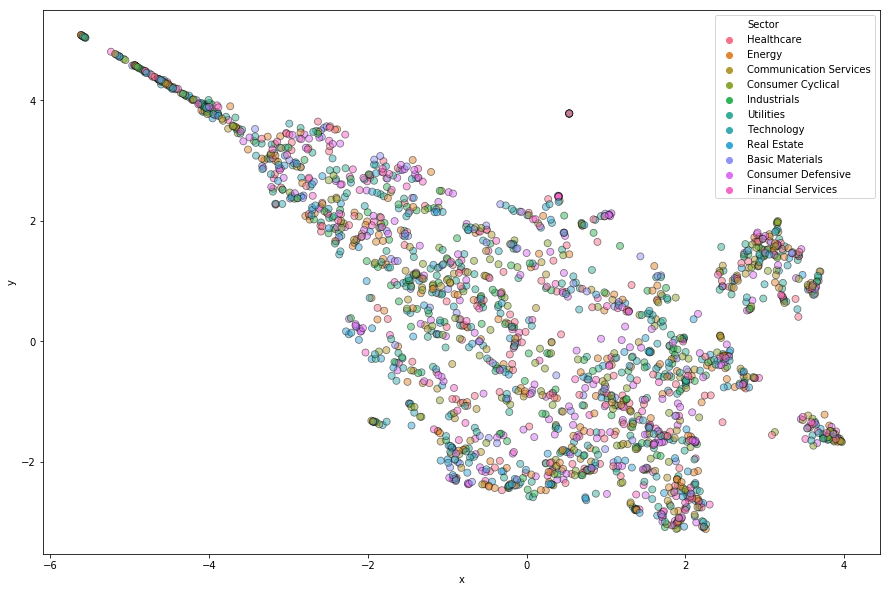

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)

sns.scatterplot(x="x", y="y",hue="Sector",data=rT,ax=ax,alpha=0.5,edgecolor="k",legend="full",markers="o",s=50,cmap="inferno")\
            #.set_title("N_Neighbors = "+str(n_neighbors)+", min_dist ="+str(min_dist)+", Metric = "+metric)
#for word, pos in rT.iterrows():
    #if word in ["0ZRNKR","5IVMAC", "839LRU"]:
 #   ax.annotate(pos["Portfolio"], pos[["x","y"]],fontsize=11,alpha=0.5)

In [0]:
from umap import UMAP
embedding = UMAP(n_neighbors=3,n_components=2,min_dist=0.0001,metric="cosine").fit_transform(portfoliosVectors.values)
r = pd.DataFrame(embedding,index=portfoliosVectors.index,columns=["x","y"])
portfolioType = allPortfolios.groupby(["portfolio","Sector"]).count()["#"].sort_values().groupby(level=0).tail(1)
portfolioType = pd.DataFrame(portfolioType)
portfolioType = portfolioType.reset_index().set_index(portfolioType.reset_index()["portfolio"])
r = r.join(portfolioType).fillna("UNK")

In [0]:
r.sort_values(by=["x","y"])

,x,y,portfolio,Sector,#
portfolio,,,,,
GP7Q38,-2.206239,-0.395230,GP7Q38,Real Estate,12
URX7C3,-2.174003,-0.493513,URX7C3,Communication Services,15
YVB50F,-2.160716,-0.477035,YVB50F,Energy,15
MXMGLG,-2.072271,-0.694834,MXMGLG,Real Estate,11
IKDG4M,-1.977387,-0.863380,IKDG4M,Real Estate,16
AYW9FU,-1.831643,-1.074550,AYW9FU,Consumer Defensive,15
9KF92U,-1.821952,1.576718,9KF92U,Technology,15
JCF4IC,-1.776984,1.648421,JCF4IC,Financial Services,14
T7MCT1,-1.761402,1.642033,T7MCT1,Consumer Cyclical,15


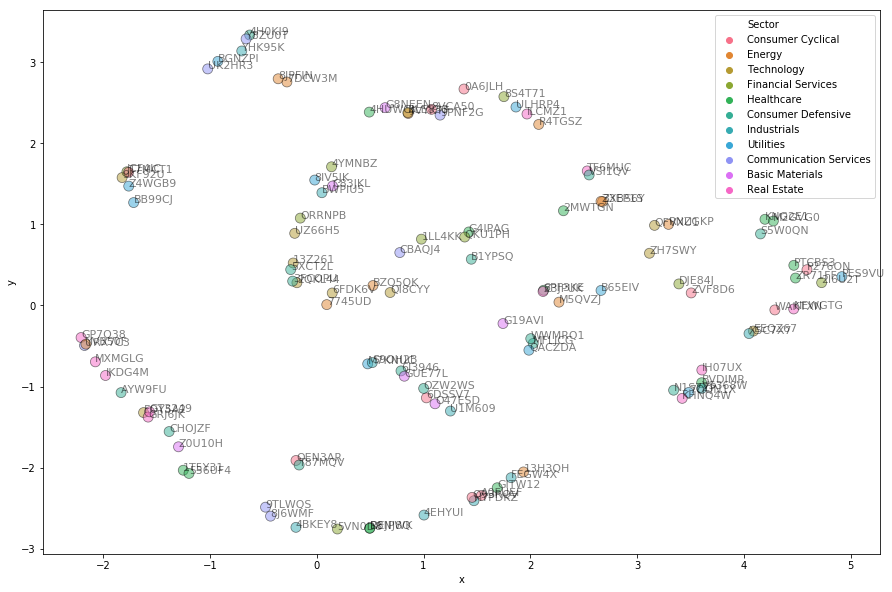

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(8)
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)

sns.scatterplot(x="x", y="y", hue="Sector",data=r,ax=ax,alpha=0.5,edgecolor="k",markers="o",s=100,legend="full",cmap="inferno")\
            #.set_title("N_Neighbors = "+str(n_neighbors)+", min_dist ="+str(min_dist)+", Metric = "+metric)
for word, pos in r.iterrows():
    #if word in ["0ZRNKR","5IVMAC", "839LRU"]:
    ax.annotate(word, pos[["x","y"]],fontsize=11,alpha=0.5)

In [0]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download("stopwords")
nltk.download("punkt")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
stops = list(stopwords.words('english'))
stops.append(".")
stops.append(",")
stops.append("it")
stops.append("its")
stops.append("the")
stops.append("also")
stops.append("inc")
stops.append("&")
stops.append("is")
stops.append("'s")
stops.append(";")
stops.append("(")
stops.append(")")
stops.append("on")
stops.append("an")
stops.append("a")
stops.append(":")
stops.append("and")
stops.append("as")

In [0]:
def removeStopWords(listOfWords):
    #print(listOfWords)
    reducedWordList = list(listOfWords)
    for word in listOfWords:
        if word in stops:
            #print(word)
            reducedWordList.remove(word)
    return reducedWordList

In [0]:
companyInfo = pd.read_csv("companyInfo.csv")

In [0]:
companyInfo.index = companyInfo.symbol

In [0]:
companyInfo["description"] = companyInfo["description"]#.fillna("UNKNOWN")
companyInfo["industry"] = companyInfo["industry"]#.fillna("UNKNOWN")
companyInfo["sector"] = companyInfo["sector"]#.fillna("UNKNOWN")

In [0]:
companyInfo["description"] = companyInfo["description"]+" "+companyInfo["sector"] +" "+ companyInfo["industry"] + companyInfo["companyName"]

In [0]:
companyInfo["description"] = companyInfo["description"].str.lower()

In [0]:
companyInfo["description"] = companyInfo["description"].apply(lambda x: word_tokenize(str(x)))

In [0]:
companyInfo["description"] = companyInfo["description"].apply(removeStopWords)

In [0]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [0]:
tagged_data = [TaggedDocument(words=row["description"], tags=[row["symbol"]]) for index,row in companyInfo.iterrows()]

In [0]:
import multiprocessing
NUM_WORKERS = multiprocessing.cpu_count()
vec_size = 12
alpha = 0.025
negative = 15
model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=3,
                dm = 1,
                epochs = 30,
                hs=1,
                ns_exponent=0.75,
                dbow_words=1
               )

In [0]:
model.build_vocab(tagged_data)

In [0]:
for epoch in range(model.epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha
    
model.save("d2v.model")
print("Model Saved")

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
Model Saved


In [0]:
wordCount ={}
allWords = []
for word, vocab_obj in model.wv.vocab.items():
    wordCount[word] = vocab_obj.count
    allWords.append(word)
wordCount

{'technologies': 313,
 'engaged': 1278,
 'life': 147,
 'sciences': 65,
 'diagnostics': 120,
 'applied': 12,
 'chemical': 69,
 'markets': 502,
 'company': 3798,
 'provides': 1175,
 'application': 333,
 'focused': 197,
 'solutions': 761,
 'include': 409,
 'instruments': 128,
 'software': 242,
 'services': 3925,
 'consumables': 11,
 'entire': 4,
 'laboratory': 12,
 'workflow': 4,
 'healthcare': 1081,
 'medical': 519,
 'corp': 1275,
 'integrated': 151,
 'aluminum': 32,
 'engages': 59,
 'production': 236,
 'bauxite': 6,
 'mining': 112,
 'manufactures': 395,
 'finished': 11,
 'goods': 56,
 'serves': 58,
 'industrial': 523,
 'end': 83,
 'basic': 307,
 'materials': 429,
 'metals': 176,
 'corporation': 944,
 'nan': 2861,
 'independent': 131,
 'non-diversified': 110,
 'closed-end': 365,
 'management': 1064,
 'investment': 1593,
 'fund': 931,
 'objective': 472,
 'seek': 147,
 'increase': 5,
 'price': 13,
 'per': 51,
 'share': 98,
 'trades': 6,
 'relative': 8,
 'values': 3,
 'principal': 27,
 'und

In [0]:
len(allWords)

3887

In [0]:
model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data

In [0]:
allDocVectors = []
sectors = []
for index,row in companyInfo.iterrows():   
    sectors.append(row["sector"])
    allDocVectors.append(model.docvecs[index])

In [0]:
stockVectors = pd.DataFrame(allDocVectors,index=companyInfo.index)

In [0]:
from google.colab import files
stockVectors.to_csv("stockVectors.tsv",sep="\t",index=False,header=False)
files.download("stockVectors.tsv")


In [0]:
companyInfo.to_csv("companyInfo.tsv",sep="\t",index=False,header=True)
files.download("companyInfo.tsv")


In [0]:
import umap
n_neighbors=25
min_dist=0
metric='cosine'
embedding = umap.UMAP(n_neighbors=n_neighbors,min_dist=min_dist,random_state=44).fit_transform(np.array(allDocVectors))

In [0]:
resultDF = pd.DataFrame(embedding,index=companyInfo.index,columns=["x","y"]).join(companyInfo)

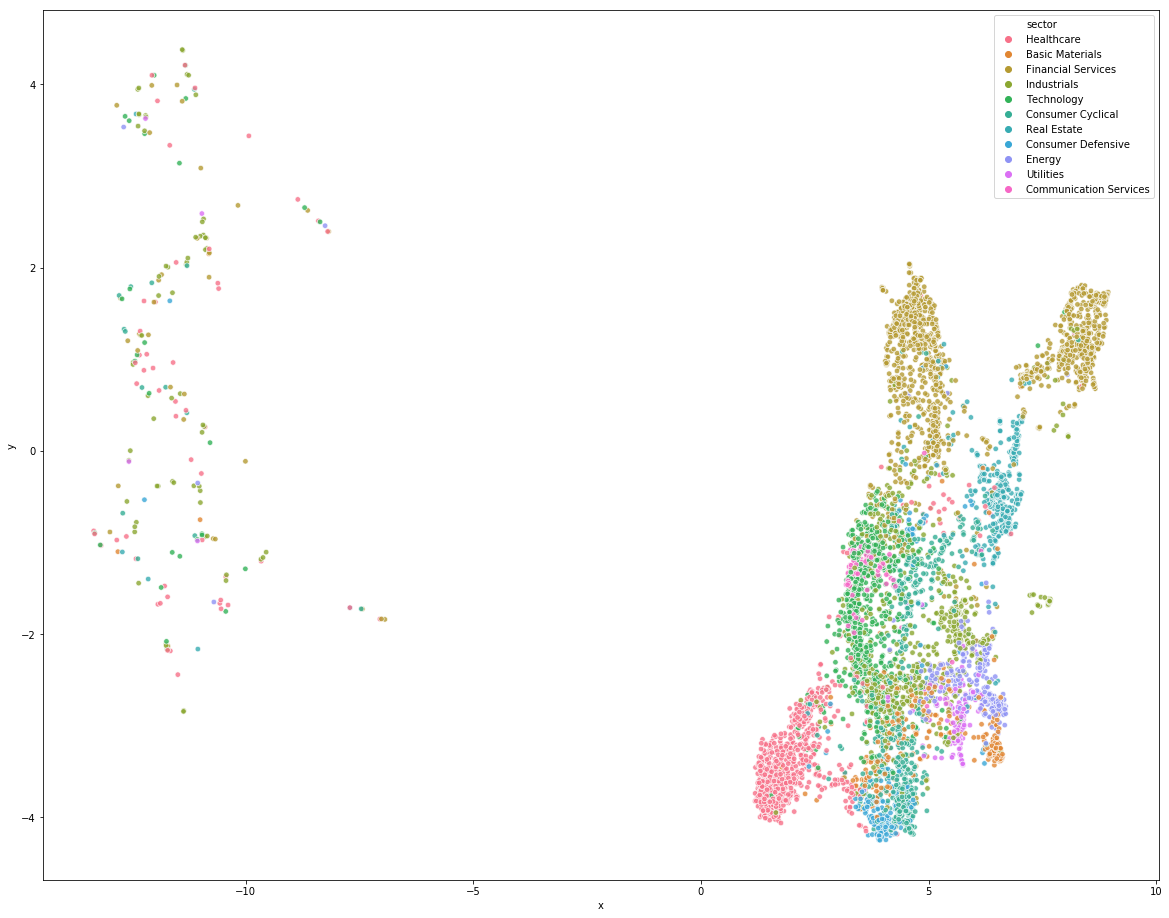

In [0]:
a4_dims = (20, 16)
fig, ax = plt.subplots(figsize=a4_dims)

sns.scatterplot(x="x", y="y", hue="sector",data=resultDF,ax=ax,alpha=0.8,edgecolor="white",markers="o",s=30)\
            #.set_title("N_Neighbors = "+str(n_neighbors)+", min_dist ="+str(min_dist)+", Metric = "+metric)

plt.legend(loc='upper right')

In [0]:
def removeCommon(list1,list2):
    newList = list1+list2
    return list(set(newList))

def findCommon(list1,list2):
    return list1+list2

In [0]:
tokens = companyInfo.loc["DIS"].description
#tokens = ['multimedia','content']
print(tokens)
new_vector = model.infer_vector(tokens)
sims = model.docvecs.most_similar([-new_vector],topn =20)
dfResults = pd.DataFrame()
for i,element in enumerate(sims):
    try:
        dfResults.at[i,"sector"] = companyInfo.loc[element[0]]["sector"]
        dfResults.at[i,"industry"] = companyInfo.loc[element[0]]["industry"]
        dfResults.at[i,"tags"] = companyInfo.loc[element[0]]["tags"]
        dfResults.at[i,"symbol"] = element[0]
        dfResults.at[i,"similarity"] = element[1]
    except KeyError:
        pass
dfResults

['walt', 'disney', 'co', 'together', 'subsidiaries', 'diversified', 'worldwide', 'entertainment', 'company', 'operations', 'four', 'business', 'segments', 'media', 'networks', 'parks', 'resorts', 'studio', 'entertainment', 'consumer', 'products', 'interactive', 'media', 'consumer', 'cyclical', 'entertainmentthe', 'walt', 'disney', 'company']


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,sector,industry,tags,symbol,similarity
0,Healthcare,Biotechnology,"['Healthcare', 'Biotechnology']",ALPN,0.668921
1,Healthcare,Medical Diagnostics & Research,"['Healthcare', 'Diagnostics & Research', 'Medi...",PTN,0.646717
2,Healthcare,Biotechnology,"['Healthcare', 'Biotechnology']",ALDX,0.622882
3,Energy,Oil & Gas - E&P,"['Energy', 'Oil & Gas E&P', 'Oil & Gas - E&P']",KOS,0.621518
4,Healthcare,Biotechnology,"['Healthcare', 'Biotechnology']",ANAB,0.615193
5,Energy,Oil & Gas - E&P,"['Energy', 'Oil & Gas E&P', 'Oil & Gas - E&P']",MTDR,0.615065
6,Energy,Oil & Gas - Drilling,"['Energy', 'Oil & Gas Drilling', 'Oil & Gas - ...",ICD,0.609891
7,Energy,Oil & Gas - Services,"['Energy', 'Oil & Gas Equipment & Services', '...",HAL,0.595661
8,Energy,Oil & Gas - E&P,"['Energy', 'Oil & Gas E&P', 'Oil & Gas - E&P']",LLEX,0.594406
9,Energy,Oil & Gas - Midstream,"['Energy', 'Oil & Gas Midstream', 'Oil & Gas -...",WGP,0.591151


In [0]:
pd.DataFrame(model.wv.most_similar(positive=["china"]),columns=["words","similarity"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,words,similarity
0,flex,0.895496
1,task,0.882016
2,organizations,0.872414
3,division,0.865548
4,urban,0.838275
5,cables,0.818551
6,bullion,0.813350
7,consists,0.811380
8,ice,0.796153
9,homeland,0.795901


In [0]:
model.docvecs.similarity("NFLX","DIS") #07 = 0.42 #08 = 0.43

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.8809984

In [0]:
model.docvecs.similarity("AMZN","TSLA"),model.docvecs.similarity("AMD","INTC"),model.docvecs.similarity("AMZN","GOOGL"),model.docvecs.similarity("GOOGL","FB")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


(0.1708899, 0.61281073, 0.7998097, 0.5957956)

In [0]:
from numpy import array
from keras.models import Model
from keras.layers import Input,Bidirectional
from keras.layers import LSTM, CuDNNLSTM,Reshape
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
vixDataScaled = scaler.fit_transform(vixData)

In [0]:
# define input sequence
seq_in = vixDataScaled
# reshape input into [samples, timesteps, features]
n_in = len(seq_in)
dims = seq_in.shape[1]
timesteps=1
samples = int(n_in/timesteps) 
seq_in = seq_in.reshape((samples, timesteps, dims))
# prepare output sequence
eq_out = seq_in[:, 1:, :]
n_out = n_in - 1
# define encoder
visible = Input(shape=(timesteps,dims))
encoder = Bidirectional(LSTM(100,activation="relu",return_sequences=True),merge_mode="concat")(visible)
encoder = Bidirectional(LSTM(80,activation="relu",return_sequences=True),merge_mode="concat")(encoder)
encoder = Bidirectional(LSTM(60,activation="relu",return_sequences=True),merge_mode="concat")(encoder)
encoder, states_h, states_h_rev, states_c, states_c_rev = Bidirectional(LSTM(50,return_state=True,return_sequences=True), merge_mode="concat")(encoder)

#states_h = Reshape((3845, 1, 50),input_s)(states_h)
#states_h_rev = Reshape((samples, timesteps, dims))(states_h_rev)



decoder1 = Bidirectional(LSTM(30, return_sequences=True))(encoder)
decoder1 = TimeDistributed(Dense(dims))(decoder1)

# define predict decoder
decoder2 = Dense(4,activation="relu")(encoder)
decoder3 = Dense(4,activation="relu")(encoder)
decoder4 = Dense(4,activation="relu")(encoder)
decoder5 = Dense(4,activation="relu")(encoder)
decoder6 = Dense(4,activation="relu")(encoder)
decoder7 = Dense(4,activation="relu")(encoder)
decoder8 = Dense(4,activation="relu")(encoder)
decoder9 = Dense(4,activation="relu")(encoder)
decoder10 = Dense(4,activation="relu")(encoder)
decoder11 = Dense(4,activation="relu")(encoder)
decoder12 = Dense(4,activation="relu")(encoder)
decoder13 = Dense(4,activation="relu")(encoder)


# tie it together
model = Model(inputs=visible, 
              outputs=[decoder1,decoder2,decoder3,decoder4,decoder5,
                       decoder6,decoder7,decoder8,decoder9,
                      decoder10,decoder11,decoder12,decoder13])
model.compile(optimizer='adam', 
              loss=['mse',"mse","mse","mse","mse","mse","mse","mse","mse","mse","mse","mse","mse"])


encoderModel = Model(visible,[encoder,states_h, states_h_rev, states_c, states_c_rev])
# fit model
model.fit(seq_in.reshape(samples,timesteps,4), 
          [seq_in,
           vixData.shift(1).fillna(0.0).values.reshape((samples, timesteps, dims)),
           vixData.shift(-1).fillna(0.0).values.reshape((samples, timesteps, dims)),
           vixData.shift(3).fillna(0.0).values.reshape((samples, timesteps, dims)),
           vixData.shift(-3).fillna(0.0).values.reshape((samples, timesteps, dims)),
          vixData.shift(5).fillna(0.0).values.reshape((samples, timesteps, dims)),
           vixData.shift(-5).fillna(0.0).values.reshape((samples, timesteps, dims)),
           vixData.shift(10).fillna(0.0).values.reshape((samples, timesteps, dims)),
           vixData.shift(-10).fillna(0.0).values.reshape((samples, timesteps, dims)),
          vixData.shift(30).fillna(0.0).values.reshape((samples, timesteps, dims)),
           vixData.shift(-30).fillna(0.0).values.reshape((samples, timesteps, dims)),
           vixData.shift(60).fillna(0.0).values.reshape((samples, timesteps, dims)),
           vixData.shift(-60).fillna(0.0).values.reshape((samples, timesteps, dims)),],
          epochs=50, 
          verbose=1)

Epoch 1/50
3845/3845 [==============================] - 17s 4ms/step - loss: 3711.0966 - time_distributed_2_loss: 0.0169 - dense_17_loss: 376.4911 - dense_18_loss: 271.3859 - dense_19_loss: 269.5475 - dense_20_loss: 349.0303 - dense_21_loss: 300.7021 - dense_22_loss: 305.1349 - dense_23_loss: 292.7729 - dense_24_loss: 342.8625 - dense_25_loss: 310.4162 - dense_26_loss: 278.8766 - dense_27_loss: 309.5526 - dense_28_loss: 304.3071
Epoch 2/50
3845/3845 [==============================] - 5s 1ms/step - loss: 2003.1417 - time_distributed_2_loss: 0.0141 - dense_17_loss: 324.9280 - dense_18_loss: 80.9140 - dense_19_loss: 80.6789 - dense_20_loss: 257.3637 - dense_21_loss: 162.9720 - dense_22_loss: 163.6390 - dense_23_loss: 95.3878 - dense_24_loss: 255.7957 - dense_25_loss: 166.3262 - dense_26_loss: 86.0645 - dense_27_loss: 168.6122 - dense_28_loss: 160.4456
Epoch 3/50
3845/3845 [==============================] - 5s 1ms/step - loss: 1761.9794 - time_distributed_2_loss: 0.0069 - dense_17_loss: 31

In [0]:
encoded = encoderModel.predict(seq_in.reshape(samples,timesteps,4))

In [0]:
encoded[1].shape

(3845, 50)

In [0]:
concated = pd.concat([pd.DataFrame(encoded[1].reshape(3845,50)),pd.DataFrame(encoded[2].reshape(3845,50))],axis=1).set_index(vixData.index)

In [0]:
prediction = pd.DataFrame(scaler.inverse_transform(model.predict(seq_in.reshape(samples,timesteps,4))[0].reshape(3845,4)))

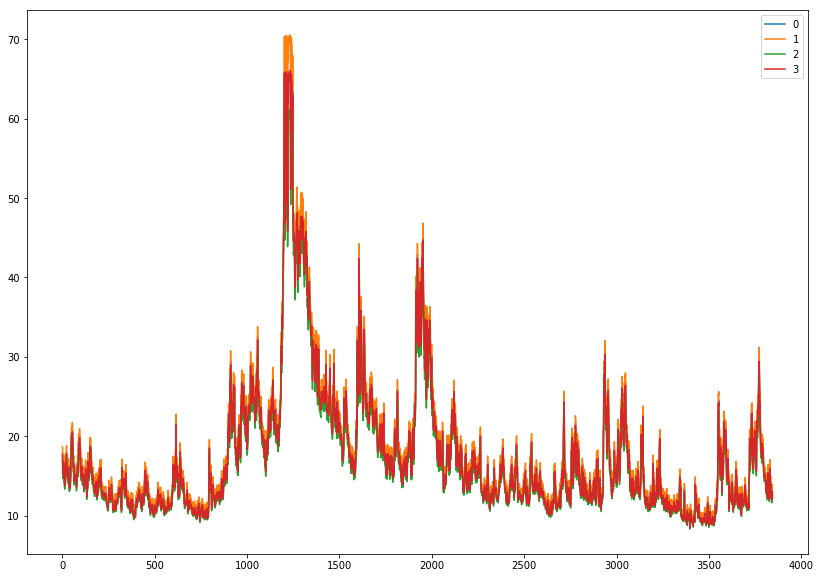

In [0]:
prediction.plot(figsize=(14,10))

In [0]:
embedding = UMAP(n_neighbors=5,metric="cosine").fit_transform(concated.values)

/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 13 separate connected components using meta-embedding (experimental)
  n_components


In [0]:
new = pd.DataFrame(index=vixData.index)
new["Year"]  = vixData.index.year
new["Month"]  = vixData.index.month
new["Day"]  = vixData.index.day
new["Week"]  = vixData.index.week

In [0]:
embeddingDF = pd.DataFrame(embedding,index=vixData.index,columns=["x","y"]).join(new)

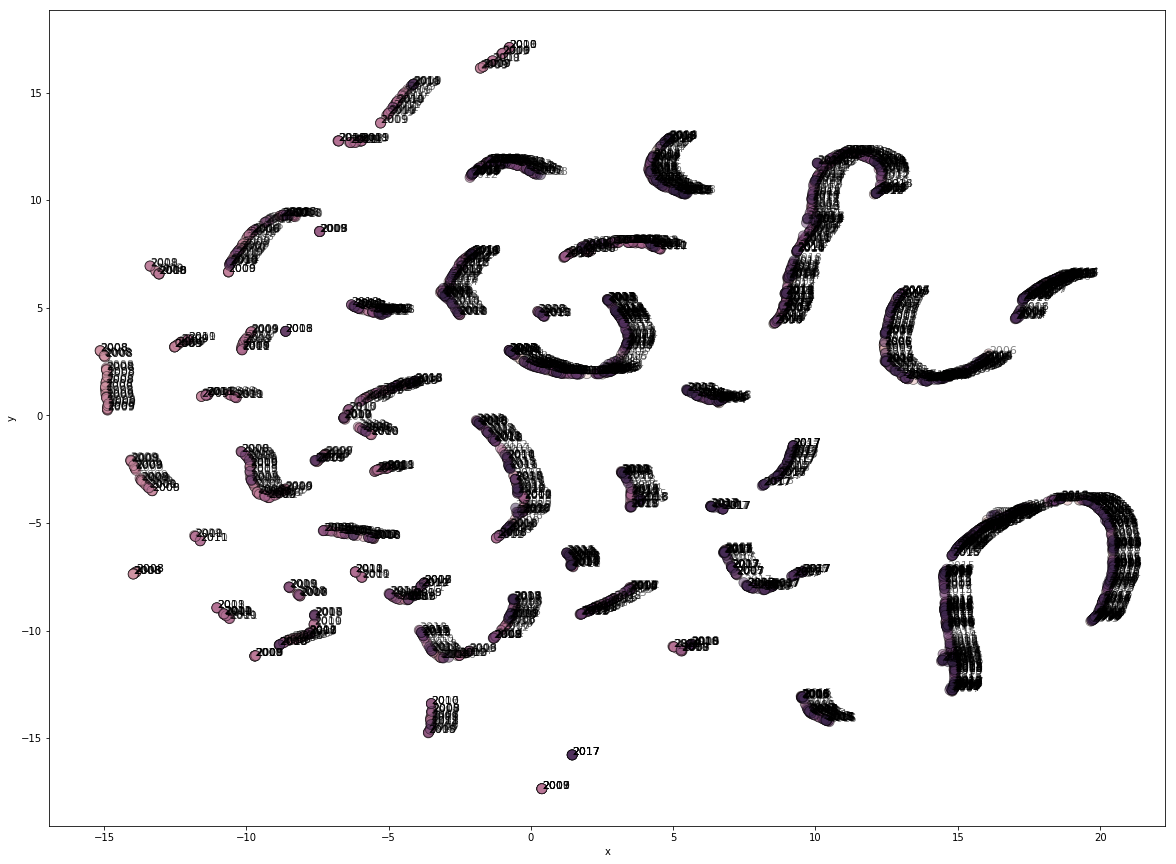

In [0]:
a4_dims = (20, 15)
fig, ax = plt.subplots(figsize=a4_dims)

sns.scatterplot(x="x", y="y",data=embeddingDF,hue="Year",ax=ax,alpha=0.5,edgecolor="k",markers="o",s=100,legend=False,cmap="inferno")\
            #.set_title("N_Neighbors = "+str(n_neighbors)+", min_dist ="+str(min_dist)+", Metric = "+metric)
for word, pos in embeddingDF.iterrows():
    #if word in ["0ZRNKR","5IVMAC", "839LRU"]:
    ax.annotate(str(word)[:4], pos[["x","y"]],fontsize=11,alpha=0.5)